In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
data = pd.read_csv('all_month.csv')
print(data.head(0)) # we use this to see the headers

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource]
Index: []

[0 rows x 22 columns]


In [4]:
data_i = data.sort_values(by = 'time', ascending = False) # sort by time
data_i_time = data_i['time']
print(data_i_time.head(1)) # print first and last value
print(data_i_time.tail(1)) # to determine time period of dataset

0    2024-01-18T02:18:19.690Z
Name: time, dtype: object
8885    2023-12-19T02:34:46.768Z
Name: time, dtype: object


The first and last entry are:

18  January     2024    02:18
19  December    2023    02:34

Time period of dataset = ~ 24 hours

Attempted to retrieve the time period of the data set by:

    data_i_time = data_i['time']
    print(data_i_time.head(1))
    print(data_i_time.tail(1))

This returned a key error as 'time' had been set to index in a previous attempt.

In [5]:
# remove rows with any missing values and compare
data_clean = data_i.dropna()
print(f'before {data_i.shape}')
print(f'after {data_clean.shape}')

before (8886, 22)
after (5210, 22)


In [6]:
# now we have a clean data set, lets get a feel for it using describe (numeric values only)
data_clean.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000
mean,32.340939,-89.014448,19.816001,1.826192,26.506718,98.038040,0.620557,0.224485,1.842194,2.591889,0.167749,20.208637
std,16.710762,77.084788,60.510299,1.395737,24.587807,56.481182,2.342621,0.261532,3.163763,5.484128,0.090970,33.018945
min,-65.494800,-179.957700,-3.160000,-0.930000,3.000000,12.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000
25%,31.707250,-122.762497,2.560000,0.830000,12.000000,60.000000,0.011060,0.050000,0.240000,0.480000,0.100000,8.000000
50%,36.698333,-116.784250,7.031300,1.360000,19.000000,82.000000,0.056275,0.140000,0.430000,0.809565,0.154000,13.000000
75%,38.833000,-104.134000,11.369000,2.340000,33.000000,121.000000,0.148600,0.227500,1.108058,1.851750,0.202000,22.000000
max,80.512900,179.877200,660.826000,7.500000,598.000000,343.000000,43.556000,1.600000,17.780000,31.610000,0.854745,722.000000


Time has not been included in .describe() because the value is in ISO 8601 format which is not numerical. Python has a 'datetime' module that can convert this for us.

In [31]:
# Assuming data_i is your original DataFrame from which data_clean is created
data_clean = data_i.dropna().copy()

# Convert 'time' to datetime
data_clean['time'] = pd.to_datetime(data_clean['time'])

# Convert 'time' to a Unix timestamp (number of seconds since January 1, 1970)
data_clean['time_numeric'] = data_clean['time'].astype('int64')

# Check the first few rows to confirm the change
print(data_clean.head())


                              time   latitude   longitude  depth   mag  \
0 2024-01-18 02:18:19.690000+00:00  38.807835 -122.823334   2.03  1.49   
1 2024-01-18 02:16:52.710000+00:00  38.808498 -122.823669   2.01  1.33   
3 2024-01-18 01:48:21.130000+00:00  36.020333 -117.781167   1.55  1.39   
4 2024-01-18 01:46:32.440000+00:00  38.826668 -122.853836   2.44  0.28   
5 2024-01-18 01:38:29.351000+00:00  -6.303000  101.441700  10.00  4.60   

  magType   nst    gap      dmin   rms  ...  \
0      md  21.0   54.0  0.004681  0.02  ...   
1      md  23.0   53.0  0.004320  0.02  ...   
3      ml  27.0   62.0  0.013780  0.16  ...   
4      md  10.0   99.0  0.002529  0.01  ...   
5      mb  26.0  190.0  2.449000  0.80  ...   

                               place        type horizontalError depthError  \
0        7 km WNW of The Geysers, CA  earthquake            0.22      0.310   
1        7 km WNW of The Geysers, CA  earthquake            0.19      0.340   
3        15 km NE of Little Lake, C

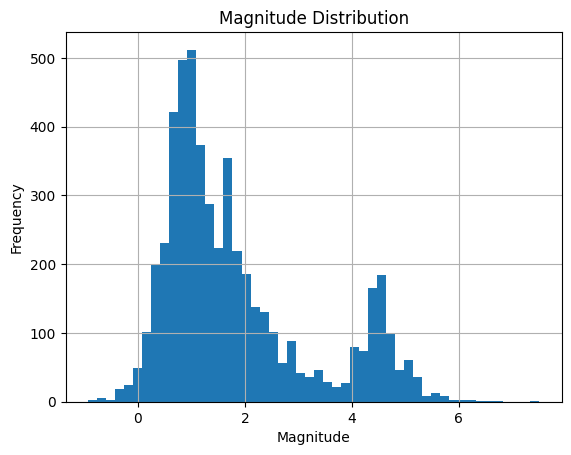

In [15]:
data_clean['mag'].hist(bins=50)
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


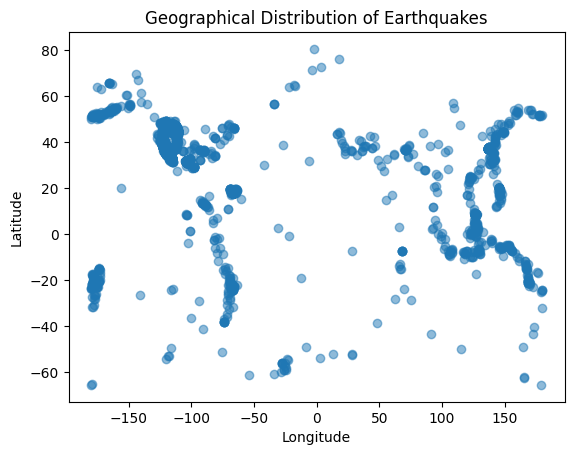

In [16]:
plt.scatter(data_clean['longitude'], data_clean['latitude'], alpha=0.5)
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

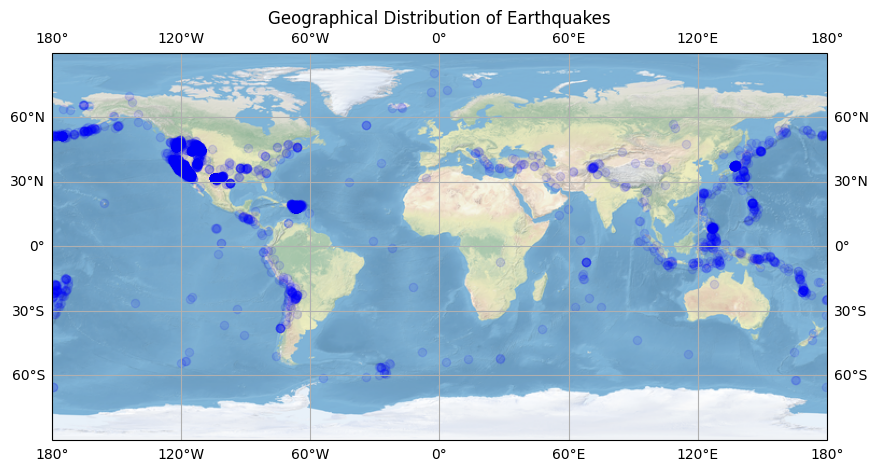

In [13]:
import cartopy.crs as ccrs

#Create a plot with a specific projection
plt.figure(figsize=(10, 10)) #set size
ax = plt.axes(projection=ccrs.PlateCarree()) #function from cartopy that superimposes the plot over an img 
ax.stock_img()  # Add a stock image of the world map

#plotting earthquake data
plt.scatter(data_clean['longitude'], data_clean['latitude'], alpha=0.10, color='blue', marker='o')

# adding gridlines, labels, and title
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title('Geographical Distribution of Earthquakes')

# Show the plot
plt.show()


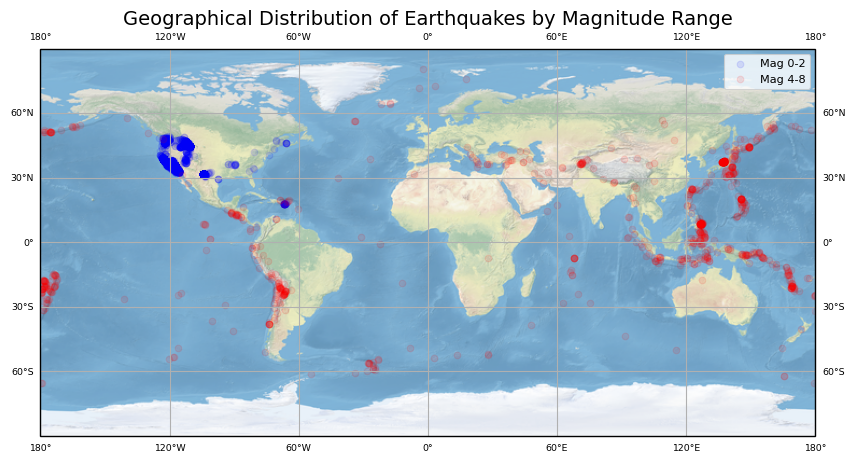

In [29]:


# Filter data for the two magnitude ranges
low_mag_data = data_clean[(data_clean['mag'] >= 0) & (data_clean['mag'] <= 2)]
mid_mag_data = data_clean[(data_clean['mag'] >= 4) & (data_clean['mag'] <= 8)]

# Set up the map projection and create a new figure
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()  # Add a stock image of the world map

# Plotting for magnitude range 0-2
ax.scatter(low_mag_data['longitude'], low_mag_data['latitude'], alpha=0.1, color='blue', marker='o', label='Mag 0-2') #by using low alpha, we get a feeling of frequency too

# Plotting for magnitude range 4-6
ax.scatter(mid_mag_data['longitude'], mid_mag_data['latitude'], alpha=0.1, color='red', marker='o', label='Mag 4-8') #by using low alpha, we get a feeling of frequency too

# Adding gridlines, labels, and title
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title('Geographical Distribution of Earthquakes by Magnitude Range', fontsize=14)
plt.legend(fontsize='large')

# Show the plot
plt.show()


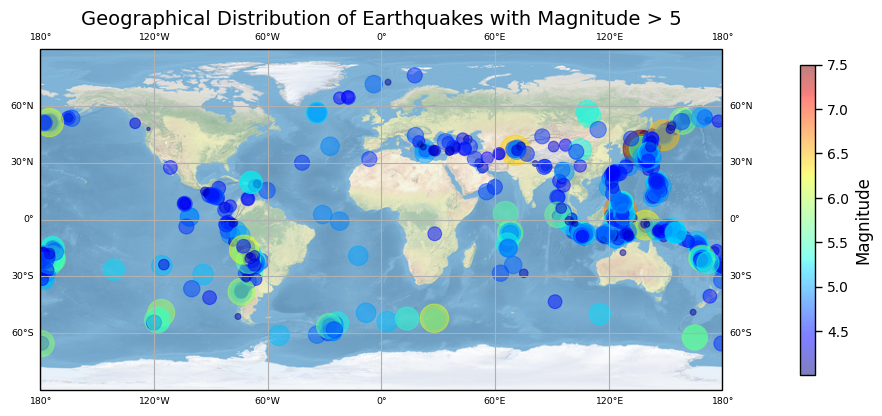

In [30]:
import matplotlib.colors as mcolors

# Filter the data for earthquakes with magnitude greater than 4
high_mag_data = data_clean[data_clean['mag'] > 4]

# Set the range of magnitudes for color coding
magnitudes = high_mag_data['mag']
normalize = mcolors.Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))

# Create a plot with a specific projection
plt.figure(figsize=(10, 10))  # Set size
ax = plt.axes(projection=ccrs.PlateCarree())  # Function from cartopy that superimposes the plot over a map
ax.stock_img()  # Add a stock image of the world map

# Plotting earthquake data with color coding by magnitude and variable size
sizes = (magnitudes - np.min(magnitudes)) * 200  # Scale the magnitudes for visibility
scatter = ax.scatter(high_mag_data['longitude'], high_mag_data['latitude'],
                     c=magnitudes,  # Color by magnitude
                     s=sizes,  # Variable sizes
                     alpha=0.5,  # Adjust transparency
                     cmap='jet',  # Colormap
                     norm=normalize,
                     transform=ccrs.PlateCarree())

# Add a colorbar with a label to the plot
cbar = plt.colorbar(scatter, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Magnitude', fontsize=12)  # Set font size for colorbar label
cbar.ax.tick_params(labelsize=10)  # Set font size for colorbar ticks

# Adding gridlines, labels, and title
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title('Geographical Distribution of Earthquakes with Magnitude > 5', fontsize=14)

# Show the plot
plt.show()


Histogram above shows majority of earthquakes during the 24 hour period were between 2 and 6 of magnitude, with outliers above 6.
Would be interesting to know where the +4 mag EQ's are.
What time do these big earthquakes occur.

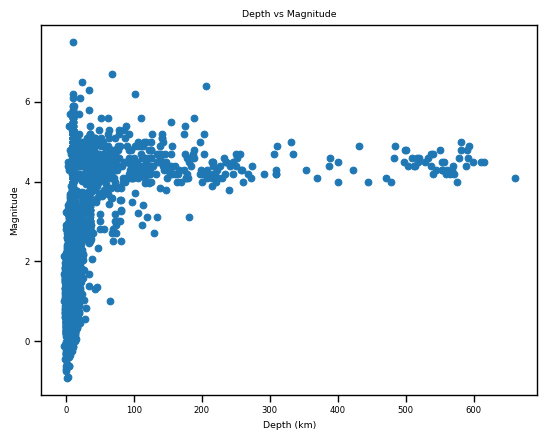

In [25]:
plt.scatter(data_clean['depth'], data_clean['mag'])
plt.title('Depth vs Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


Scatter plot shows great variance at shallow depth and more consitency from 100m and deeper. 

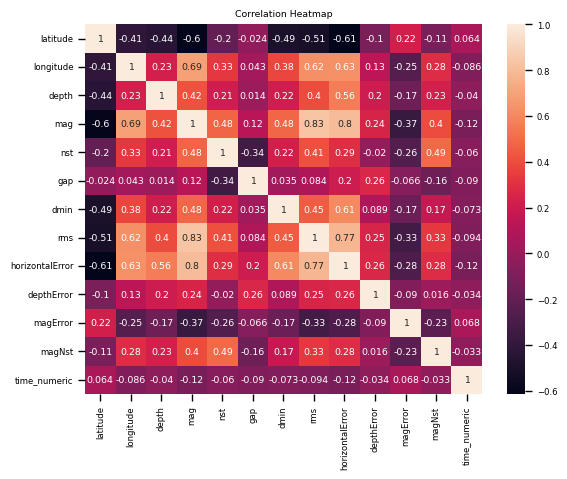

In [24]:
import seaborn as sns
sns.set_context('paper', font_scale=0.7)  # adjust the font scale

# select only the numerical columns for correlation
numerical_data = data_clean.select_dtypes(include=[np.number])

# calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Ccreate a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


Correlation Heatmap

Looking for high correlations and trying to validate them.

rms =   rootmeansquare measures the magnitude of a varying quantity and for eathquakes this is the rms of the seismic signal associated with the earhquake as recorded by seismographs
        in this case that means the rms value measures seismic noise, indicating  how 'clean' a signal is which affects the measurement accuracy. the higher rms number the more noise and less accuracy.
mag =   magnitude of the earthquake, exponential

in this case the 0.83 between rms|mag makes sense because the higher the magnitude of earthquake, the more violent it is causing all sorts of interferance with the instruments at the station

similarly, rms|horizontalError also have a high correlation of 0.77 indicating...

Time appears to have weak corelation throughout.

Superimposing the map coordinates over a map of the world adds another layer of information to the plot. The locations of the recorded earthquakes indicates where tectonic plates meet and gives an idea of their shape.

BELOW IS EXPERIMENTING

In [36]:
# Check for columns without any NaN values
no_nan_columns = data_i.columns[~data_i.isna().any()]

#print the columns that have no NaN values
print(no_nan_columns)

''' 
--  data_i.isna() creates a boolean DataFrame where True represents missing values.
--  any() is used to check each column for any True values (i.e., any missing values in the column). 
    It returns a boolean Series where True indicates the presence of missing values in a column.
--  ~ is a logical NOT operator, used here to invert the boolean Series, so True becomes False and vice versa. 
    This inverts our criteria to look for columns without any missing values.
--  data_i.columns[...] selects the column names from the original DataFrame where the condition is met (i.e., no NaN values are present).
'''

# with the print below, we now know which columns are populated fully and deduce the columns with no values

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'rms',
       'net', 'id', 'updated', 'place', 'type', 'depthError', 'status',
       'locationSource', 'magSource'],
      dtype='object')


' \n--  data_i.isna() creates a boolean DataFrame where True represents missing values.\n--  any() is used to check each column for any True values (i.e., any missing values in the column). \n    It returns a boolean Series where True indicates the presence of missing values in a column.\n--  ~ is a logical NOT operator, used here to invert the boolean Series, so True becomes False and vice versa. \n    This inverts our criteria to look for columns without any missing values.\n--  data_i.columns[...] selects the column names from the original DataFrame where the condition is met (i.e., no NaN values are present).\n'

In [30]:
# Columns with missing data
missing_data_columns = data_i.columns[data_i.isna().any()]
print("Columns with missing data:", missing_data_columns)

''' 
no point looking for any correlation unless we understand what the column headers mean.
    nst             -   number of seismic stations that recorded the earthquake
    gap             -   Azimuthal Gap, the largest angle between adjecent stations
    dmin            -   Minimum Distance, min horizontal distance from epicenter to nearest st, degrees
    horizontalError -   uncertainty associated with location of eq (long/latitude), km
    magError        -   +/- error in magnitude
    magNst          -   Number of Stations Reporting Magnitude, similar to nst but specifically ofr the number of st's used to calculate magnitude

initially it seems that some of the NaN values are because of lack of information from st's.

    
    '''

Columns with missing data: Index(['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst'], dtype='object')
